In [6]:
import json  
import zipfile
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
d = None  
data = None  
with zipfile.ZipFile("/home/wenbenc/two-sigma-connect-rental-listing-inquiries/train.json.zip", "r") as z:
    for filename in z.namelist():
        print(filename)
        with z.open(filename) as f:
            data = f.read()
            d = json.loads(data.decode("utf-8"))

train.json


In [8]:
my_df = pd.DataFrame(d)
pd.set_option('display.max_columns', 3)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
print(my_df)

        bathrooms  bedrooms                       building_id              created                                        description       display_address                                           features  latitude  listing_id  longitude                        manager_id                                             photos  price           street_address interest_level
4             1.0         1  8579a0b0d54db803821a35a4a615e97a  2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   -73.9539  a10db4590843d78c784171a107bdacb4  [https://photos.renthop.com/2/7170325_3bb5ac84...   2400      145 Borinquen Place         medium
6             1.0         2  b8e75fc949a6cd8225b455648a951712  2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   -73.9722  955db33477af4f4

In [9]:
# Find out the maximum price from dataset
maxPrice = my_df['price'].max()

# Analyze the Price data from dataset
step = 2000
priceBin =[]
for index in range(0, maxPrice+1, step):
    priceBin.append(index)

my_df['PriceInterval'] = pd.cut(my_df['price'], priceBin)
df_countPrice = pd.value_counts(my_df.PriceInterval, sort = False)

df_countPrice = df_countPrice.to_frame()
# Delete the interval with no attribute
df_countPrice = df_countPrice[(df_countPrice.T != 0).any()]

In [10]:
# Output the list of Price data
print(df_countPrice)

                    PriceInterval
(0, 2000]                    5309
(2000, 4000]                31287
(4000, 6000]                 8993
(6000, 8000]                 2294
(8000, 10000]                 591
(10000, 12000]                295
(12000, 14000]                218
(14000, 16000]                147
(16000, 18000]                 56
(18000, 20000]                 53
(20000, 22000]                 13
(22000, 24000]                 12
(24000, 26000]                 16
(26000, 28000]                 13
(28000, 30000]                 20
(30000, 32000]                  4
(34000, 36000]                  5
(36000, 38000]                  2
(38000, 40000]                  2
(44000, 46000]                  2
(48000, 50000]                  4
(50000, 52000]                  2
(52000, 54000]                  1
(54000, 56000]                  1
(58000, 60000]                  2
(78000, 80000]                  1
(84000, 86000]                  1
(88000, 90000]                  1
(98000, 100000

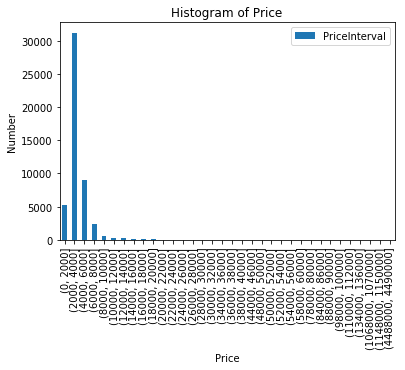

In [11]:
# Plot the histogram for Price data
df_countPrice.plot(kind='bar', title= 'Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

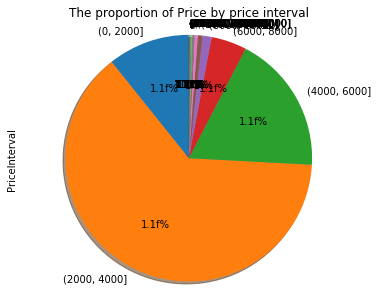

In [12]:
# Display the proportion of Price by price interval
df_countPrice['PriceInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Price by price interval')
plt.axis('equal')
plt.show()

In [13]:
# Analyze the Price data from the most frequent price interval (2000, 4000] into 10 pieces
step = 200
priceBin =[]
for index in range(2000, 4000+1, step):
    priceBin.append(index)

my_df['PriceInterval'] = pd.cut(my_df['price'], priceBin)
price_count = pd.value_counts(my_df.PriceInterval, sort = False)

price_count = price_count.to_frame()

In [14]:
# Output the list of Price data from the most frequent price interval (2000, 4000]
print(price_count)

              PriceInterval
(2000, 2200]           2554
(2200, 2400]           3343
(2400, 2600]           4034
(2600, 2800]           3952
(2800, 3000]           3962
(3000, 3200]           3036
(3200, 3400]           3092
(3400, 3600]           2953
(3600, 3800]           2320
(3800, 4000]           2041


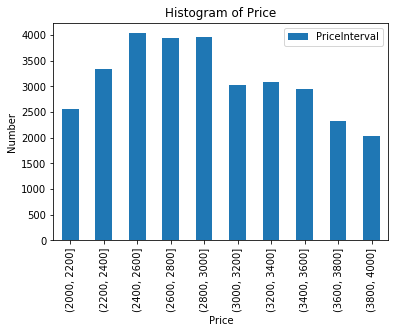

In [15]:
# Plot the histogram for Price data from the most frequent price interval (2000, 4000]
price_count.plot(kind='bar', title= 'Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Number')
plt.show()

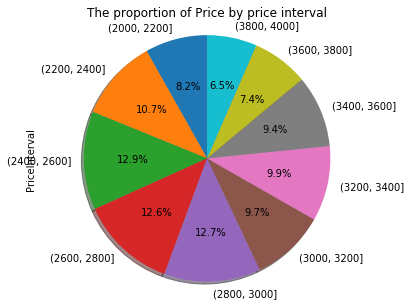

In [16]:
# Display the proportion of Price by the most frequent price interval (2000, 4000]
price_count['PriceInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Price by price interval')
plt.axis('equal')
plt.show()

In [17]:
# Find out the maximum Latitude from dataset
maxLatitude = int(my_df['latitude'].max()) + 1
# Find out the minimum Latitude from dataset
minLatitude = int(my_df['latitude'].min()) - 1

# Analyze the Latitude data from dataset
step = 1
latitudeBin = []
for index in range(minLatitude, maxLatitude, step):
    latitudeBin.append(index)

my_df['latitudeInterval'] = pd.cut(my_df['latitude'], latitudeBin)
df_countLatitude = pd.value_counts(my_df.latitudeInterval, sort = False)

df_countLatitude = df_countLatitude.to_frame()
# Delete the interval with no attribute
df_countLatitude = df_countLatitude[(df_countLatitude.T != 0).any()]

In [18]:
# Output the list of Latitude data
print(df_countLatitude)

          latitudeInterval
(-1, 0]                 12
(34, 35]                 1
(39, 40]                 2
(40, 41]             49312
(41, 42]                 9
(42, 43]                13
(43, 44]                 1


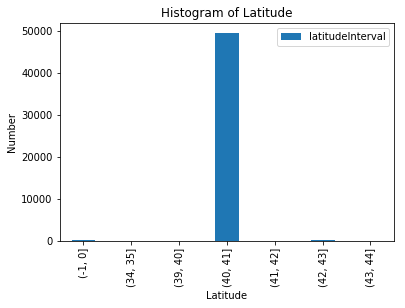

In [19]:
# Plot the histogram for Latitude data
df_countLatitude.plot(kind='bar', title= 'Histogram of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Number')
plt.show()

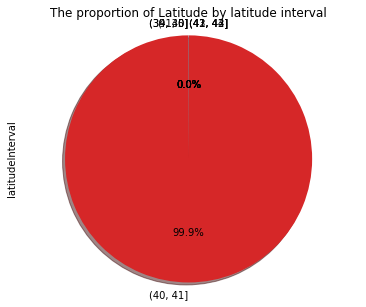

In [20]:
# Display the proportion of Latitude by latitude interval
df_countLatitude['latitudeInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Latitude by latitude interval')
plt.axis('equal')
plt.show()

In [21]:
# Analyze the Latitude data from the most frequent latitude interval (40, 41] into 10 pieces
step = 1
latitudeBin =[]
for index in range(400, 410+1, step):
    latitudeBin.append(index/10)

my_df['latitudeInterval'] = pd.cut(my_df['latitude'], latitudeBin)
latitude_count = pd.value_counts(my_df.latitudeInterval, sort = False)

latitude_count = latitude_count.to_frame()

In [22]:
# Output the list of latitude data from the most frequent Latitude interval (40, 41]
print(latitude_count)

              latitudeInterval
(40.0, 40.1]                 1
(40.1, 40.2]                 1
(40.2, 40.3]                 0
(40.3, 40.4]                 0
(40.4, 40.5]                 0
(40.5, 40.6]               138
(40.6, 40.7]              3415
(40.7, 40.8]             41929
(40.8, 40.9]              3806
(40.9, 41.0]                22


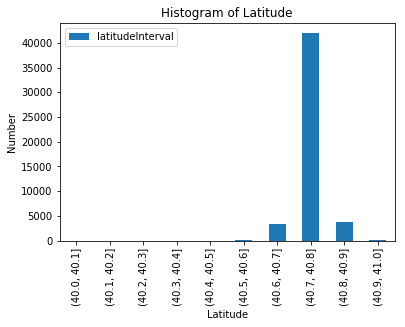

In [23]:
# Plot the histogram for Latitude data from the most frequent Latitude interval (40, 41]
latitude_count.plot(kind='bar', title= 'Histogram of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Number')
plt.show()

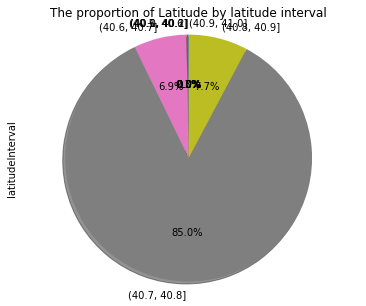

In [24]:
# Display the proportion of latitude by the most frequent Latitude interval (40, 41]
latitude_count['latitudeInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Latitude by latitude interval')
plt.axis('equal')
plt.show()

In [25]:
# Analyze the Latitude data from the most frequent latitude interval (40.7, 40.8] into 10 pieces
step = 1
latitudeBin =[]
for index in range(4070, 4080+1, step):
    latitudeBin.append(index/100)

my_df['latitudeInterval'] = pd.cut(my_df['latitude'], latitudeBin)
latitudeCount_count = pd.value_counts(my_df.latitudeInterval, sort = False)

latitudeCount_count = latitudeCount_count.to_frame()

In [26]:
# Output the list of latitude data from the most frequent latitude interval (40.7, 40.8]
print(latitudeCount_count)

                latitudeInterval
(40.7, 40.71]               3673
(40.71, 40.72]              2111
(40.72, 40.73]              4037
(40.73, 40.74]              4752
(40.74, 40.75]              5933
(40.75, 40.76]              4366
(40.76, 40.77]              6383
(40.77, 40.78]              5462
(40.78, 40.79]              3218
(40.79, 40.8]               1994


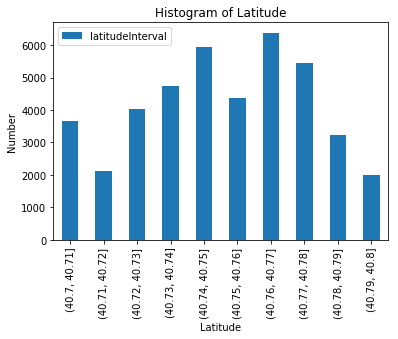

In [27]:
# Plot the histogram for Latitude data from the most frequent latitude interval (40.7, 40.8]
latitudeCount_count.plot(kind='bar', title= 'Histogram of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Number')
plt.show()

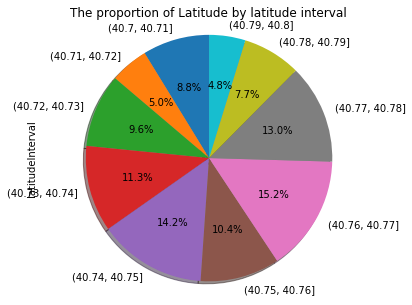

In [28]:
# Display the proportion of Latitude by the most frequent latitude interval (40.7, 40.8]
latitudeCount_count['latitudeInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Latitude by latitude interval')
plt.axis('equal')
plt.show()

In [24]:
# Find out the maximum Longitude from dataset
maxLongitude = int(my_df['longitude'].max()) + 1
# Find out the minimum Longitude from dataset
minLongitude = int(my_df['longitude'].min()) - 1

# Analyze the Longitude data from dataset
step = 1
longitudeBin =[]
for index in range(minLongitude, maxLongitude, step):
    longitudeBin.append(index)

my_df['longitudeInterval'] = pd.cut(my_df['longitude'], longitudeBin)
df_countLongitude = pd.value_counts(my_df.longitudeInterval, sort = False)

df_countLongitude = df_countLongitude.to_frame()
# Delete the interval with no attribute
df_countLongitude = df_countLongitude[(df_countLongitude.T != 0).any()]

In [25]:
# Output the list of Longitude data
print(df_countLongitude)

              longitudeInterval
(-119, -118]                  1
(-94, -93]                    1
(-88, -87]                    1
(-87, -86]                    1
(-77, -76]                    1
(-76, -75]                    2
(-75, -74]                 7185
(-74, -73]                42136
(-73, -72]                    1
(-72, -71]                    7
(-71, -70]                    4
(-1, 0]                      12


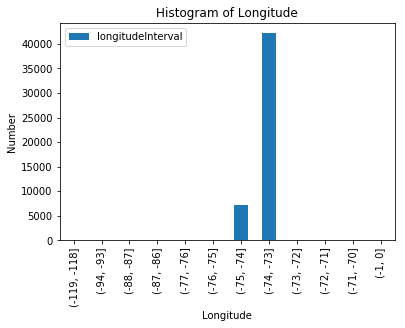

In [26]:
# Plot the histogram for Longitude data
df_countLongitude.plot(kind='bar', title= 'Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Number')
plt.show()

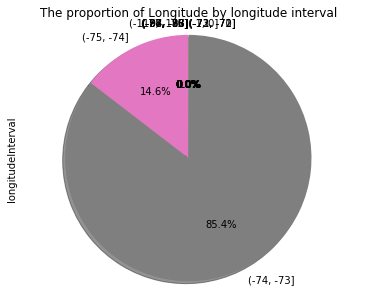

In [27]:
# Display the proportion of Longitude by longitude interval
df_countLongitude['longitudeInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Longitude by longitude interval')
plt.axis('equal')
plt.show()

In [28]:
# Analyze the Longitude data from the most frequent longitude interval (-74, -73] into 10 pieces
step = 1
longitudeBin =[]
for index in range(-740, -730+1, step):
    longitudeBin.append(index/10)

my_df['longitudeInterval'] = pd.cut(my_df['longitude'], longitudeBin)
longitude_count = pd.value_counts(my_df.longitudeInterval, sort = False)

longitude_count = longitude_count.to_frame()

In [29]:
# Output the list of Longitude data from the most frequent longitude interval (-74, -73]
print(longitude_count)

                longitudeInterval
(-74.0, -73.9]              41084
(-73.9, -73.8]                992
(-73.8, -73.7]                 53
(-73.7, -73.6]                  0
(-73.6, -73.5]                  4
(-73.5, -73.4]                  2
(-73.4, -73.3]                  0
(-73.3, -73.2]                  1
(-73.2, -73.1]                  0
(-73.1, -73.0]                  0


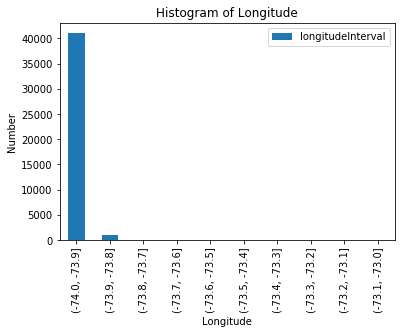

In [30]:
# Plot the histogram for Longitude data from the most frequent longitude interval (-74, -73]
longitude_count.plot(kind='bar', title= 'Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Number')
plt.show()

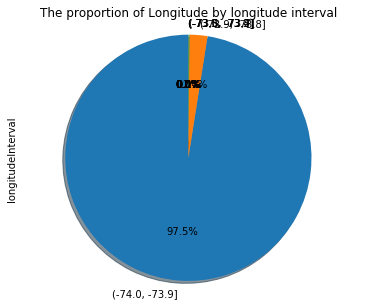

In [31]:
# Display the proportion of longitude by the most frequent longitude interval (-74, -73]
longitude_count['longitudeInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Longitude by longitude interval')
plt.axis('equal')
plt.show()

In [32]:
# Analyze the Longitude data from the most frequent longitude interval (-74.0, -73.9] into 10 pieces
step = 1
longitudeBin =[]
for index in range(-7400, -7390+1, step):
    longitudeBin.append(index/100)

my_df['longitudeInterval'] = pd.cut(my_df['longitude'], longitudeBin)
longitudeCount_count = pd.value_counts(my_df.longitudeInterval, sort = False)

longitudeCount_count = longitudeCount_count.to_frame()

In [33]:
# Output the list of Longitude data from the most frequent longitude interval (-74.0, -73.9]
print(longitudeCount_count)

                  longitudeInterval
(-74.0, -73.99]                6560
(-73.99, -73.98]               9147
(-73.98, -73.97]               6570
(-73.97, -73.96]               4826
(-73.96, -73.95]               6666
(-73.95, -73.94]               4503
(-73.94, -73.93]               1084
(-73.93, -73.92]                907
(-73.92, -73.91]                576
(-73.91, -73.9]                 245


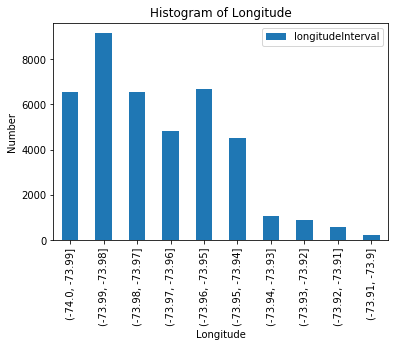

In [34]:
# Plot the histogram for Longitude data from the most frequent longitude interval (-74.0, -73.9]
longitudeCount_count.plot(kind='bar', title= 'Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Number')
plt.show()

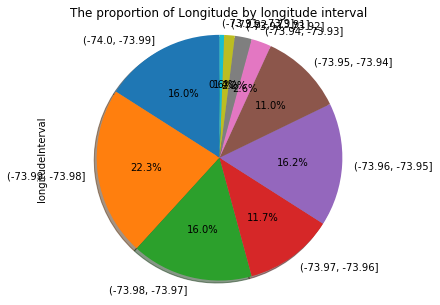

In [35]:
# Display the proportion of longitude by the most frequent longitude interval (-74.0, -73.9]
longitudeCount_count['longitudeInterval'].plot(kind='pie',
                       figsize=(6,5),
                       autopct = '%1.1f%%',
                       startangle=90,
                       shadow=True,
                      )
plt.title('The proportion of Longitude by longitude interval')
plt.axis('equal')
plt.show()

In [72]:
# Analyze the time data from created dataset
timebins = []
for time_index in range(24):
    timebins.append(time_index)
hours = pd.to_datetime(my_df['created'])
hours = hours.dt.hour
my_df['TimeInterval'] = pd.cut(hours, timebins)

In [73]:
# Output the list of Hour data
df_countHour = pd.value_counts(my_df.TimeInterval, sort = False)
print(df_countHour)

(0, 1]       5749
(1, 2]      10596
(2, 3]       8318
(3, 4]       5021
(4, 5]       7954
(5, 6]       4446
(6, 7]       1047
(7, 8]        336
(8, 9]        135
(9, 10]       284
(10, 11]      444
(11, 12]      693
(12, 13]      616
(13, 14]      782
(14, 15]      753
(15, 16]      370
(16, 17]      443
(17, 18]      450
(18, 19]      266
(19, 20]      191
(20, 21]      178
(21, 22]      139
(22, 23]       86
Name: TimeInterval, dtype: int64


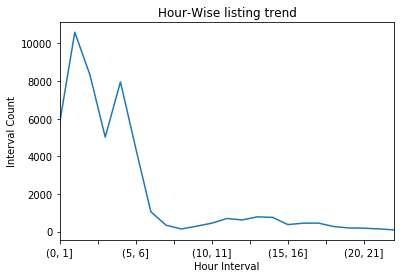

In [77]:
#Hour-Wise listing trend graph
df_countHour.plot(kind='line',title='Hour-Wise listing trend')
plt.xlabel('Hour Interval')
plt.ylabel ('Interval Count')
plt.show()

In [78]:
# Find out the top 5 busiest hours 
hour_count = pd.value_counts(my_df.TimeInterval).head()

In [79]:
# Output the list of Time data with the top 5 busiest hours
print(hour_count)

(1, 2]    10596
(2, 3]     8318
(4, 5]     7954
(0, 1]     5749
(3, 4]     5021
Name: TimeInterval, dtype: int64


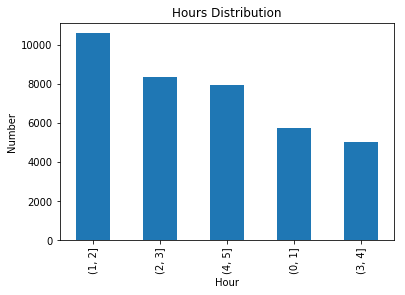

In [80]:
# Plot the histogram for Time data with the top 5 busiest hours
hour_count.plot(kind='bar', title= 'Hours Distribution')
plt.xlabel('Hour')
plt.ylabel('Number')
plt.show()

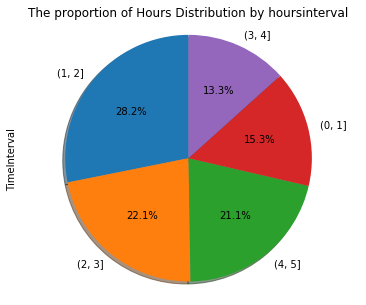

In [81]:
# Display the Hours Distribution by hours interval with the top 5 busiest hours
hour_count.plot(kind='pie',
                figsize=(6,5),
                autopct = '%1.1f%%',
                startangle=90,
                shadow=True,
               )
plt.title('The proportion of Hours Distribution by hoursinterval')
plt.axis('equal')
plt.show()